In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

import os

pd.options.display.max_columns = 500
pd.options.display.max_rows = 1000

In [15]:
# Iterate through unemployment files
dfs = {}
directory = '../data/unemployment'

for file_name in os.listdir(directory):
    if file_name.endswith(".csv"):
        df = pd.read_csv(os.path.join(directory, file_name))
        dfs[file_name] = df

In [16]:
columns = ['time', 'unemployment_index']
master = pd.DataFrame(columns=columns)

for file_name, df in dfs.items():
    print(file_name)
    master = master.merge(df, how='outer', on=columns)

200507-200514.csv
200430-200507.csv
200420-200427.csv
200508-200515.csv
200505-200512.csv
200428-200505.csv
200506-200513.csv
200503-200510.csv
200504-200511.csv
200509-200516.csv


In [22]:
# Convert to datetime
master['time'] = pd.to_datetime(master['time'])

# Get average of time values
master_grouped = master.groupby('time', as_index=False)['unemployment_index'].mean()
master_grouped.sort_values(by='time', inplace=True)

In [39]:
def make_plot(df):
    plt.figure(figsize=(20,16))
    plt.plot(df['time'], df['unemployment_index'])
    plt.title('Relative Percent of Previous Year TSA Traffic', fontsize=20)
    plt.ylabel('Relative Percent', fontsize=16)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

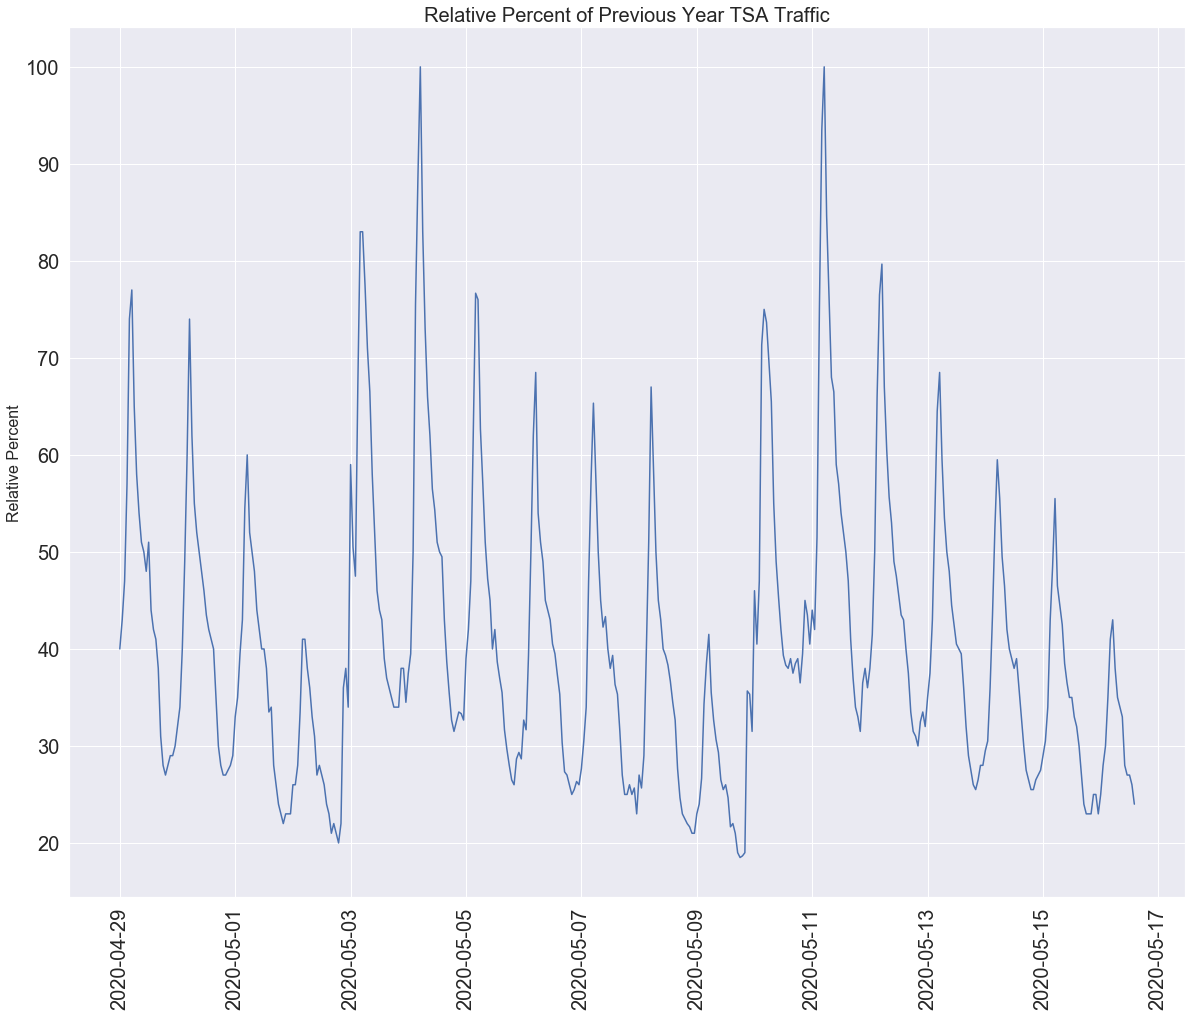

In [44]:
make_plot(master_grouped[180:])

In [37]:
# Claims weeks
ui_claims = {
    'week end 200321': {
        'dates': ('2020-03-15', '2020-03-21'),
        'ui_claims': 2920162
    },
    'week end 200328': {
        'dates': ('2020-03-22', '2020-03-28'),
        'ui_claims': 6015821
    },
    'week end 200404': {
        'dates': ('2020-03-29', '2020-04-04'),
        'ui_claims': 6211406
    },
    'week end 200411': {
        'dates': ('2020-04-05', '2020-04-11'),
        'ui_claims': 4965046
    },
    'week end 200418': {
        'dates': ('2020-04-12', '2020-04-18'),
        'ui_claims': 4281648
    },
    'week end 200425': {
        'dates': ('2020-04-19', '2020-04-25'),
        'ui_claims': 3839000
    },
    'week end 200502': {
        'dates': ('2020-04-26', '2020-05-02'),
        'ui_claims': 3176000
    },
    'week end 200509': {
        'dates': ('2020-05-03', '2020-05-09'),
        'ui_claims': 2981000
    },
    'week end 200516': {
        'dates': ('2020-05-10', '2020-05-16'),
        'ui_claims': 0
    }
}

In [46]:
for key in ui_claims.keys():
    date_range = ui_claims[key]['dates']
    claims = ui_claims[key]['ui_claims']
    
    condition = (master_grouped['time'] >= date_range[0]) & (master_grouped['time'] <= date_range[1]) 
    temp_df = master_grouped[condition]
    total_index = temp_df['unemployment_index'].sum()
    
    print(date_range)
    print(claims)
    print(total_index)

('2020-03-15', '2020-03-21')
2920162
0.0
('2020-03-22', '2020-03-28')
6015821
0.0
('2020-03-29', '2020-04-04')
6211406
0.0
('2020-04-05', '2020-04-11')
4965046
0.0
('2020-04-12', '2020-04-18')
4281648
0.0
('2020-04-19', '2020-04-25')
3839000
4441.0
('2020-04-26', '2020-05-02')
3176000
5415.5
('2020-05-03', '2020-05-09')
2981000
6181.583333333334
('2020-05-10', '2020-05-16')
0
6276.5


In [48]:
recent_unemployment_proportion = 2981000 / 6181.583333333334

In [49]:
current_week_index = 6276.5
current_week_expectation = recent_unemployment_proportion * current_week_index
print('Expected number of UI claims this week:', current_week_expectation)

Expected number of UI claims this week: 3026772.509739953
